La empresa necesita comprender los factores que llevan a la pérdida de clientes

- Enfrenta altas tasas de cancelaciones



# Parte 1: EDA

## Extracción

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

data = pd.read_json(url)
data

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [27]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [28]:
dfs = []
df_json = data.drop(['customerID', 'Churn'], axis = 1)

#Iterar sobre las columnas anidadas
for col_df in df_json.columns:
    df = pd.json_normalize(data[col_df], sep = "_")
    dfs.append(df)

dfs.insert(0, data['Churn'])
dfs.insert(0, data['customerID'])
df_final = pd.concat(dfs, axis = 1)
df_final


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Transformación

**Significado de las columnas:**

- customerID: número de identificación único de cada cliente

- Churn: si el cliente dejó o no la empresa

- gender: género (masculino y femenino)

- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

- Partner: si el cliente tiene o no una pareja

- Dependents: si el cliente tiene o no dependientes

- tenure: meses de contrato del cliente

- PhoneService: suscripción al servicio telefónico

- MultipleLines: suscripción a más de una línea telefónica

- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [30]:
df_final.describe()

,SeniorCitizen,tenure,Charges_Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [31]:
pd.set_option('display.max_columns', None)
df_final.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
2794,3873-NFTGI,No,Male,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.50,767.55
4174,5716-LIBJC,No,Female,0,No,Yes,13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.15,1299.1
1449,2080-CAZNM,No,Female,1,No,No,41,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,4133.95
4528,6204-IEUXJ,Yes,Female,0,No,No,3,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),80.10,217.55
5666,7740-KKCXF,No,Male,0,Yes,No,51,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),30.05,1529.45
4754,6509-TSGWN,No,Female,0,Yes,Yes,37,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,26.45,911.6
3417,4730-AWNAU,No,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55
4034,5519-YLDGW,Yes,Female,0,Yes,No,21,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.90,2254.2
5353,7311-MQJCH,No,Female,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.55,99.6
624,0887-HJGAR,Yes,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7


In [32]:
df_final.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

### **Descripción de las columnas**

1. customerID: 4 números y 5 letras. ej: 4332-MUOEZ
2. Churn: booleano (Yes, No) - No:0, Yes:1

Hay registros " " donde no sabemos si dejó o no la empresa.

3. gender: male - female; se podría poner 0 y 1.

females: 0, male: 1

4. SeniorCitizen: booleano (0 , 1)
5. 'Partner': booleano (Yes, No)
6. 'Dependents':: booleano (Yes, No)
7. 'tenure': número de meses (int)
8. 'PhoneService': booleano (Yes, No)
9. 'MultipleLines': booleano (Yes, No)

Si no hay servicio de telefonía, entonces es No

10. 'InternetService': Cuando no hay suscripción, se pone 'No'; sino, el tipo

Si no hay servicio de internet, entonces no hay demás aplicaciones

No:0, DLS:1, fibra óptica: 2

11. 'OnlineSecurity': booleano (Yes, No) - Pero si no hay suscripcón, se pone 'no internet service'
12. 'OnlineBackup': booleano (Yes, No) - 'no internet service'
13. 'DeviceProtection': booleano (Yes, No) - 'no internet service'
14. 'TechSupport': booleano (Yes, No) - 'no internet service'
15. 'StreamingTV': booleano (Yes, No) - 'no internet service'
16. 'StreamingMovies': booleano (Yes, No) - 'no internet service'
17. 'Contract': tipos de contrato Month-to-month ó x year

'Month-to-month': 0, 'One year': 1, 'Two year': 2

18. 'PaperlessBilling': booleano (Yes, No)
19. 'PaymentMethod': tipo String

'Mailed check':0, 'Electronic check':1, 'Credit card (automatic)':2, Bank transfer (automatic):3

20. 'Charges_Monthly': tipo Float
21. 'Charges_Total': tipo Float

In [33]:
unicos = []
for col in df_final.columns:
    unicos.append(df_final[col].unique())
    if ("Yes" in df_final[col].unique()) and ("No" in df_final[col].unique()) and not ("" in df_final[col].unique()):
        if (len(df_final[col].unique()) == 3) :
            print(col)
            for i, registro in enumerate(df_final[col]):
                if (registro != "Yes") and (registro != "No"):
                    df_final[col] = df_final[col].replace(registro, "No")
print(unicos)

MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
[array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object), array(['No', 'Yes', ''], dtype=object), array(['Female', 'Male'], dtype=object), array([0, 1]), array(['Yes', 'No'], dtype=object), array(['Yes', 'No'], dtype=object), array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0]), array(['Yes', 'No'], dtype=object), array(['No', 'Yes', 'No phone service'], dtype=object), array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['No', 'Yes', 'No internet service'], dtype=object), array(['Yes', 'No', 'No internet service'], dtype=object), array(['No', 'Yes', 'No

### Estandarización de datos

In [34]:
#df_final.columns[1:]
mapa_valores = {
    "Yes": 1,
    "No": 0,

    "Male": 1,
    "Female": 0,

    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,

    "DSL": 1,
    "Fiber optic": 2,

    "Mailed check": 0,
    "Electronic check": 1,
    "Credit card (automatic)": 2,
    "Bank transfer (automatic)": 3

}
df_final = df_final.replace(mapa_valores)
df_final.head(10)



/tmp/ipython-input-34-1010640718.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.replace(mapa_valores)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,1,1,0,65.60,593.3
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,0,59.90,542.4
2,0004-TLHLJ,1,1,0,0,0,4,1,0,2,0,0,1,0,0,0,0,1,1,73.90,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,2,0,1,1,0,1,1,0,1,1,98.00,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,2,0,0,0,1,1,0,0,1,0,83.90,267.4
5,0013-MHZWF,0,0,0,0,1,9,1,0,1,0,0,0,1,1,1,0,1,2,69.40,571.45
6,0013-SMEOE,0,0,1,1,0,71,1,0,2,1,1,1,1,1,1,2,1,3,109.70,7904.25
7,0014-BMAQU,0,1,0,1,0,63,1,1,2,1,0,0,1,0,0,2,1,2,84.65,5377.8
8,0015-UOCOJ,0,0,1,0,0,7,1,0,1,1,0,0,0,0,0,0,1,1,48.20,340.35
9,0016-QLJIS,0,0,0,1,1,65,1,1,1,1,1,1,1,1,1,2,1,0,90.45,5957.9


In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   int64  
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   int64  


In [36]:
df_final['Charges_Total'] = df_final['Charges_Total'].replace(" ", 0)
df_final['Churn'] = df_final['Churn'].replace("", 2)

/tmp/ipython-input-36-2474129365.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['Churn'] = df_final['Churn'].replace("", 2)


In [37]:
df_final['Charges_Total'] = df_final['Charges_Total'].astype(float)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   int64  
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   int64  


**Cuentas diarias**

---



In [38]:
df_final['Cuentas_Diarias'] = df_final['Charges_Monthly'] / 30
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,1,1,0,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,0,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,2,0,0,1,0,0,0,0,1,1,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,2,0,1,1,0,1,1,0,1,1,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,2,0,0,0,1,1,0,0,1,0,83.9,267.40,2.796667


In [39]:
print(type(df_final['Cuentas_Diarias'][0]))

<class 'numpy.float64'>


## Carga y análisis

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
df_final.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.318839,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,1.222513,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.688730,0.593230,1.423971,64.720098,2277.182035,2.157337
std,0.528079,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.779873,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.833174,0.491265,1.067676,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.425000,396.200000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.875000,3778.525000,2.995833
max,2.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


In [42]:
frecuencia = df_final['Churn'].value_counts()
label_churn = ["No", "Sí", "No se sabe"]
frecuencia

,count
Churn,
0,5174
1,1869
2,224


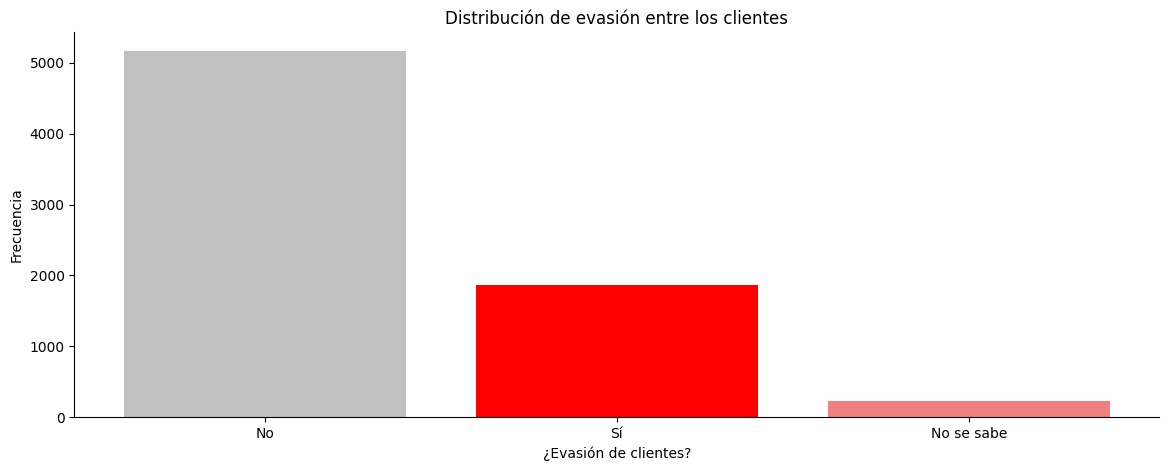

In [43]:
colors = ["silver", "red", "lightcoral"]

fig, ax = plt.subplots(figsize=(14, 5))

ax.spines["top"].set_visible(False) #Quita la raya del cuadro (arriba)
ax.spines["right"].set_visible(False) #Quita la raya del cuadro (Derecha)

ax.bar(label_churn, frecuencia, color=colors)
ax.set_title('Distribución de evasión entre los clientes')
ax.set_xlabel('¿Evasión de clientes?')
ax.set_ylabel('Frecuencia')

plt.show()

In [44]:
categorias = {
    "Género": ["Mujeres", "Hombres"],
    "¿Señores de edad?": ["No", "Sí"],
    "¿Pareja?": ["No", "Sí"],
    "¿Dependientes?": ["No", "Sí"],
    "¿Servicio de teléfono?": ["No", "Sí"],
    "¿Múltiples líneas?": ["No", "Sí"],
    "Servicio de internet": ["No", "DSL", "Fibra óptica"],
    "¿Seguridad online?": ["No", "Sí"],
    "¿Respaldo en línea?": ["No", "Sí"],
    "¿Protección del dispositivo?": ["No", "Sí"],
    "¿Soporte técnico?": ["No", "Sí"],
    "¿Streaming TV?": ["No", "Sí"],
    "¿Streaming Movies?": ["No", "Sí"],
    "Tipo de contrato": ["Mes a mes", "Un año", "Dos años"],
    "¿Factura en línea?": ["No", "Sí"],
    "Método de pago": ["Cheque", "Transferencia electrónica", "Tarjeta de crédito", "Transferencia bancaria"]

}

target = list(df_final.columns[2:-3])
target.remove("tenure")

#Se aplica el conteo de cada serie por separado, alojando cuántos hay de cada tipo
df_churn = df_final.groupby(['Churn'])[target].apply(lambda x: x.apply(pd.Series.value_counts).fillna(0))
df_churn

gender  SeniorCitizen  Partner  Dependents  PhoneService  \
Churn                                                               
0     0  2549.0         4508.0   2441.0      3390.0         512.0   
      1  2625.0          666.0   2733.0      1784.0        4662.0   
      2     0.0            0.0      0.0         0.0           0.0   
      3     0.0            0.0      0.0         0.0           0.0   
1     0   939.0         1393.0   1200.0      1543.0         170.0   
      1   930.0          476.0    669.0       326.0        1699.0   
      2     0.0            0.0      0.0         0.0           0.0   
      3     0.0            0.0      0.0         0.0           0.0   
2     0   104.0          184.0    108.0       153.0          25.0   
      1   120.0           40.0    116.0        71.0         199.0   
      2     0.0            0.0      0.0         0.0           0.0   
      3     0.0            0.0      0.0         0.0           0.0   

         MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
Churn                                                                   
0     0         3053.0           1413.0          3450.0        3268.0   
      1         2121.0           1962.0          1724.0        1906.0   
      2            0.0           1799.0             0.0           0.0   
      3            0.0              0.0             0.0           0.0   
1     0         1019.0            113.0          1574.0        1346.0   
      1          850.0            459.0           295.0         523.0   
      2            0.0           1297.0             0.0           0.0   
      3            0.0              0.0             0.0           0.0   
2     0          130.0             55.0           165.0         149.0   
      1           94.0             67.0            59.0          75.0   
      2            0.0            102.0             0.0           0.0   
      3            0.0              0.0             0.0           0.0   

         DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
Churn                                                                  
0     0            3297.0       3440.0       3281.0           3260.0   
      1            1877.0       1734.0       1893.0           1914.0   
      2               0.0          0.0          0.0              0.0   
      3               0.0          0.0          0.0              0.0   
1     0            1324.0       1559.0       1055.0           1051.0   
      1             545.0        310.0        814.0            818.0   
      2               0.0          0.0          0.0              0.0   
      3               0.0          0.0          0.0              0.0   
2     0             155.0        164.0        141.0            140.0   
      1              69.0         60.0         83.0             84.0   
      2               0.0          0.0          0.0              0.0   
      3               0.0          0.0          0.0              0.0   

         Contract  PaperlessBilling  PaymentMethod  
Churn                                               
0     0    2220.0            2403.0           1304  
      1    1307.0            2771.0           1294  
      2    1647.0               0.0           1290  
      3       0.0               0.0           1286  
1     0    1655.0             469.0            308  
      1     166.0            1400.0           1071  
      2      48.0               0.0            232  
      3       0.0               0.0            258  
2     0     130.0              84.0             53  
      1      46.0             140.0             80  
      2      48.0               0.0             46  
      3       0.0               0.0             45

In [45]:
print(df_churn.index[:4])
print(df_churn.index[:4][0]) # Cada una sería el tipo de Churn
print(df_churn.index[5:8][0])
print(df_churn.index[9:12][0])

print(df_churn.columns[:4])
print(df_churn.columns[:4][0])
print()

print(df_churn["gender"][0]) #Sale el conteo de los géneros para el "No"
print(df_churn["gender"][0][1])
#print(categorias["gender"])
print(df_churn["gender"][0][3] == 0)
print(len(df_churn["gender"][0]))
print(df_churn["gender"][1])

MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (0, 3)],
           names=['Churn', None])
(np.int64(0), np.int64(0))
(np.int64(1), np.int64(1))
(np.int64(2), np.int64(1))
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')
gender

0    2549.0
1    2625.0
2       0.0
3       0.0
Name: gender, dtype: float64
2625.0
True
4
0    939.0
1    930.0
2      0.0
3      0.0
Name: gender, dtype: float64


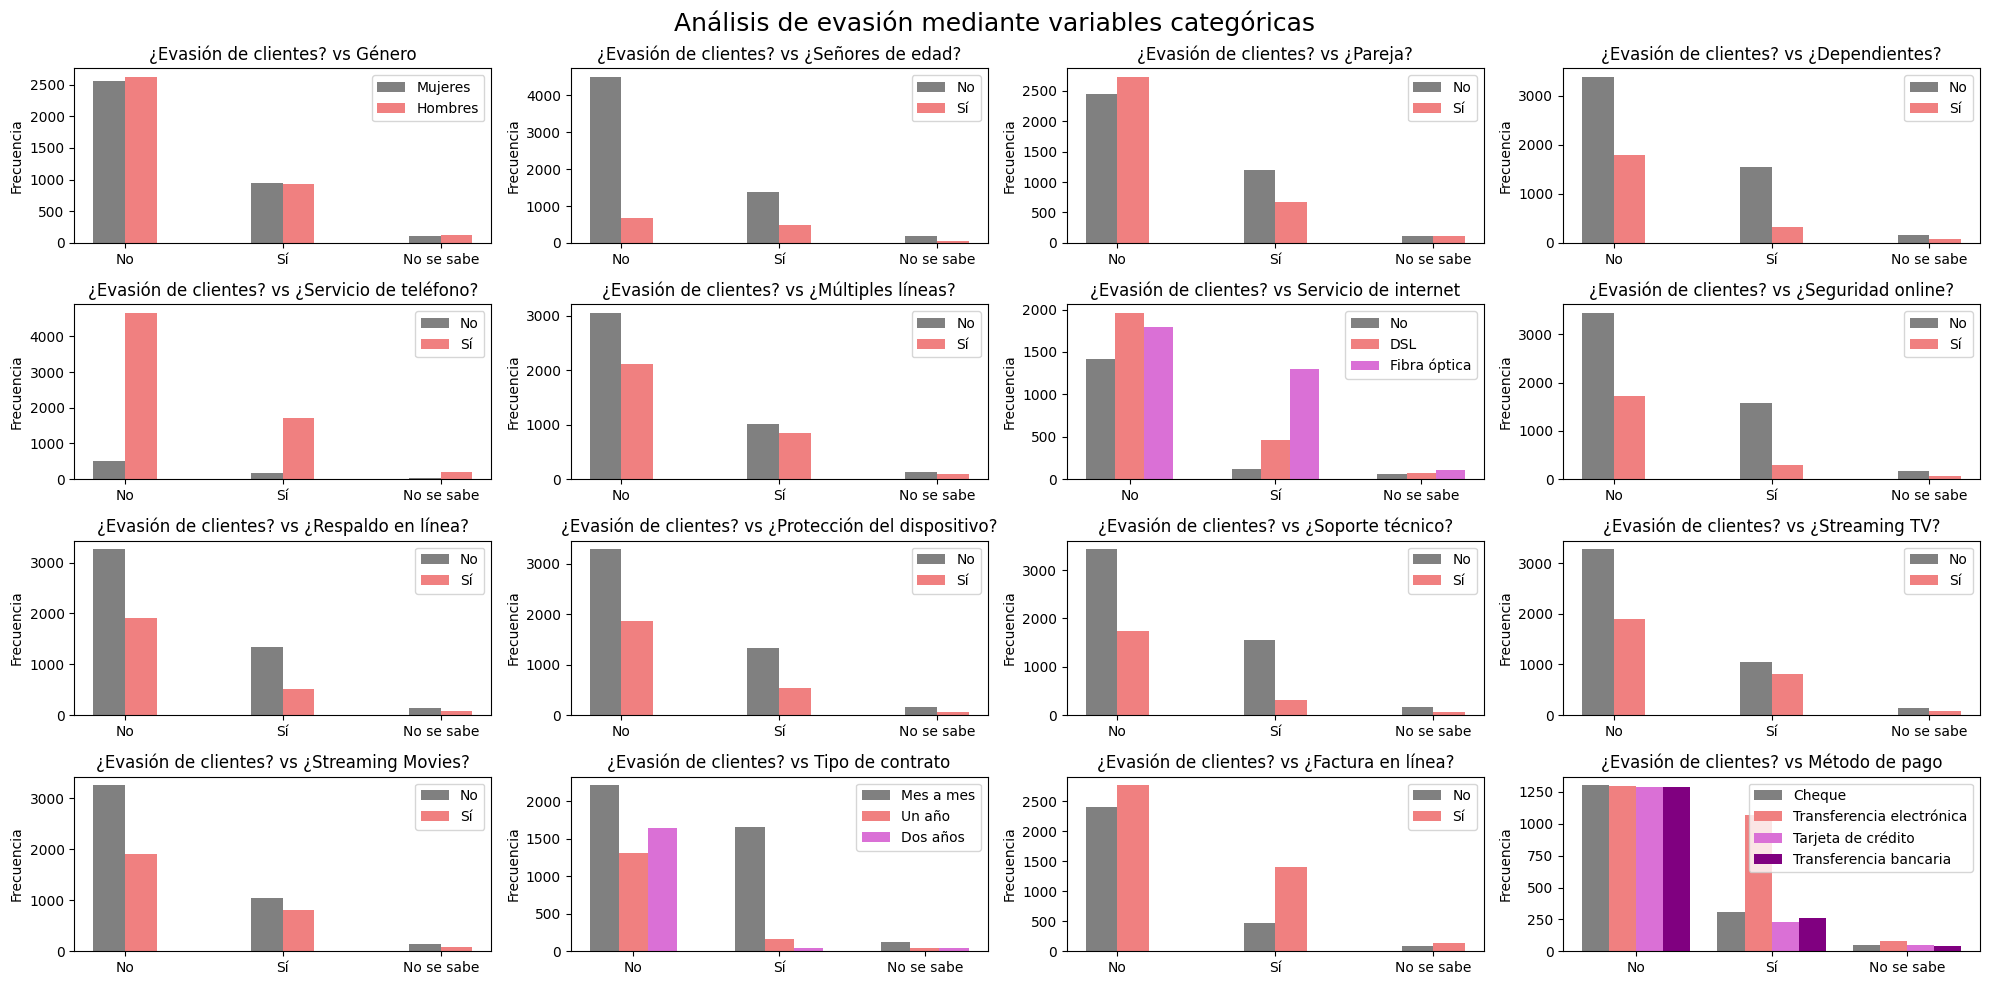

In [46]:
iter = list(categorias)
num_graficos = len(target)  # Número total de gráficos
filas, columnas = 4, 4

# Crear una figura con una cuadrícula de subgráficos
fig, axs = plt.subplots(filas, columnas, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3) #Ajuste de espaciado entre las figuras
fig.suptitle("Análisis de evasión mediante variables categóricas", fontsize=18)

# Aplanar la matriz de ejes para facilitar la iteración
axs = axs.flatten()

for i, col in enumerate(target):
    x = np.arange(len(label_churn))
    width = 0.2

    v_1 = [df_churn[col][0][0], df_churn[col][1][0], df_churn[col][2][0]]
    v_2 = [df_churn[col][0][1], df_churn[col][1][1], df_churn[col][2][1]]
    v_3 = [df_churn[col][0][2], df_churn[col][1][2], df_churn[col][2][2]]
    v_4 = [df_churn[col][0][3], df_churn[col][1][3], df_churn[col][2][3]]

    ax = axs[i]  # Seleccionar el eje correspondiente

    if df_churn[col][0][3] != 0:
        ax.bar(x - width*1.5, v_1, width, label=categorias[iter[i]][0], color='grey')
        ax.bar(x - width/2, v_2, width, label=categorias[iter[i]][1], color='lightcoral')
        ax.bar(x + width/2, v_3, width, label=categorias[iter[i]][2], color='orchid')
        ax.bar(x + width*1.5, v_4, width, label=categorias[iter[i]][3], color='purple')
    elif df_churn[col][0][2] != 0:
        ax.bar(x - width, v_1, width, label=categorias[iter[i]][0], color='grey')
        ax.bar(x, v_2, width, label=categorias[iter[i]][1], color='lightcoral')
        ax.bar(x + width, v_3, width, label=categorias[iter[i]][2], color='orchid')
    else:
        ax.bar(x - width/2, v_1, width, label=categorias[iter[i]][0], color='grey')
        ax.bar(x + width/2, v_2, width, label=categorias[iter[i]][1], color='lightcoral')

    ax.set_xticks(x)
    ax.set_xticklabels(label_churn)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'¿Evasión de clientes? vs {iter[i]}')
    ax.legend()

# Ajustar espacios entre gráficos para mejor visualización
plt.tight_layout()
plt.show()


In [47]:
dfn_churn = df_final[["Churn", "tenure", "Charges_Monthly", "Cuentas_Diarias","Charges_Total"]]
dfn_churn

,Churn,tenure,Charges_Monthly,Cuentas_Diarias,Charges_Total
0,0,9,65.60,2.186667,593.30
1,0,9,59.90,1.996667,542.40
2,1,4,73.90,2.463333,280.85
3,1,13,98.00,3.266667,1237.85
4,1,3,83.90,2.796667,267.40
...,...,...,...,...,...
7262,0,13,55.15,1.838333,742.90
7263,1,22,85.10,2.836667,1873.70
7264,0,2,50.30,1.676667,92.75
7265,0,67,67.85,2.261667,4627.65


In [48]:
list(dfn_churn[["Churn"]].value_counts())

[5174, 1869, 224]

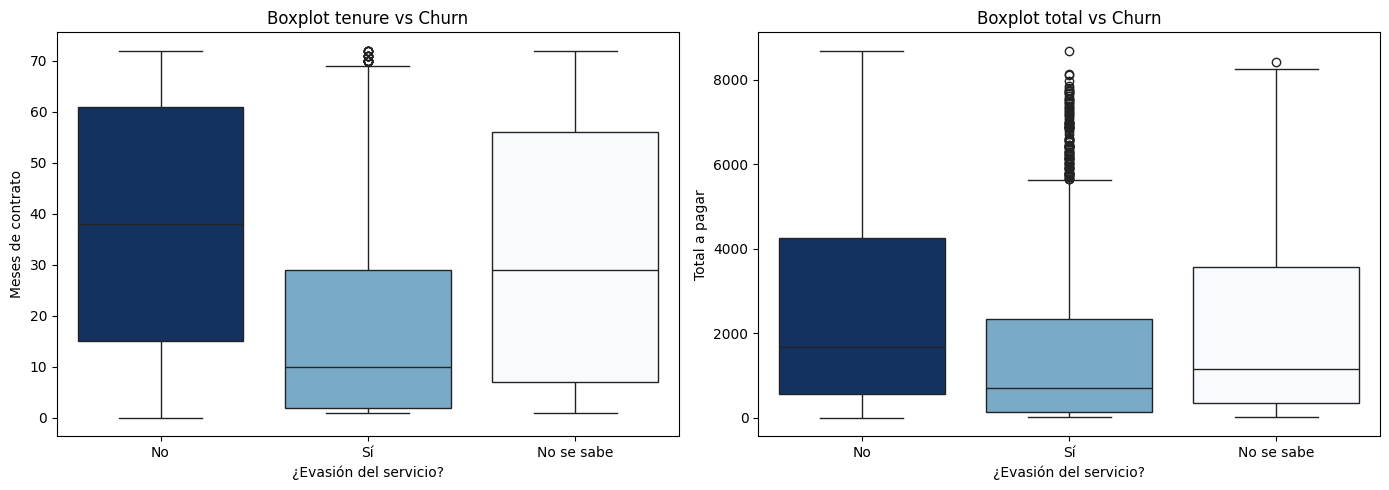

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))


sns.boxplot(x="Churn", y="tenure", data=dfn_churn,
            palette="Blues_r", hue="Churn", ax=ax[0], legend=False)

ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(["No", "Sí", "No se sabe"])
ax[0].set_title("Boxplot tenure vs Churn")
ax[0].set_xlabel("¿Evasión del servicio?")
ax[0].set_ylabel("Meses de contrato")


sns.boxplot(x="Churn", y="Charges_Total", data=dfn_churn,
            palette="Blues_r", hue="Churn", ax=ax[1], legend=False)

ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(["No", "Sí", "No se sabe"])
ax[1].set_title("Boxplot total vs Churn")
ax[1].set_xlabel("¿Evasión del servicio?")
ax[1].set_ylabel("Total a pagar")

plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()


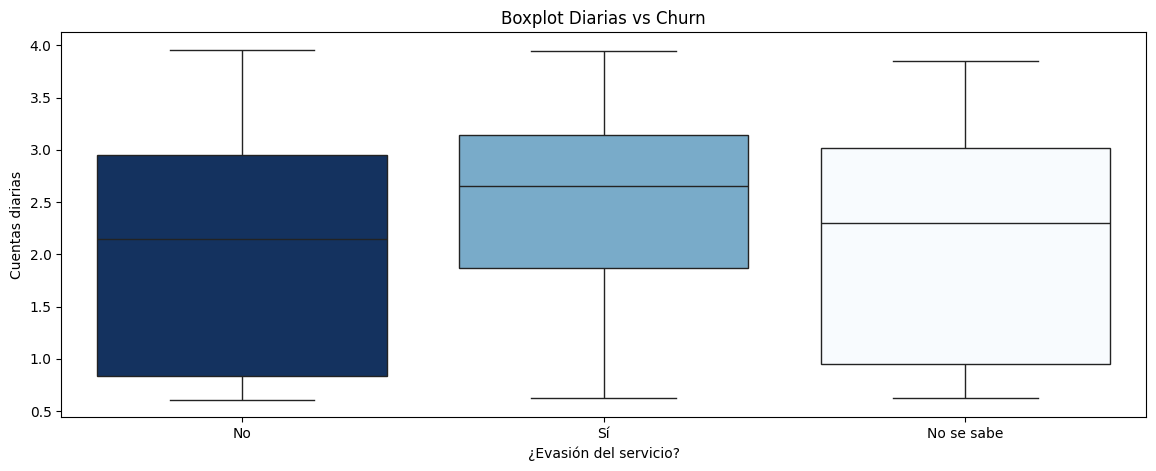

In [50]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(x="Churn", y="Cuentas_Diarias", data=dfn_churn,
            palette="Blues_r", hue="Churn", legend=False)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(["No", "Sí", "No se sabe"])
ax.set_title("Boxplot Diarias vs Churn")
ax.set_xlabel("¿Evasión del servicio?")
ax.set_ylabel("Cuentas diarias")

plt.show()

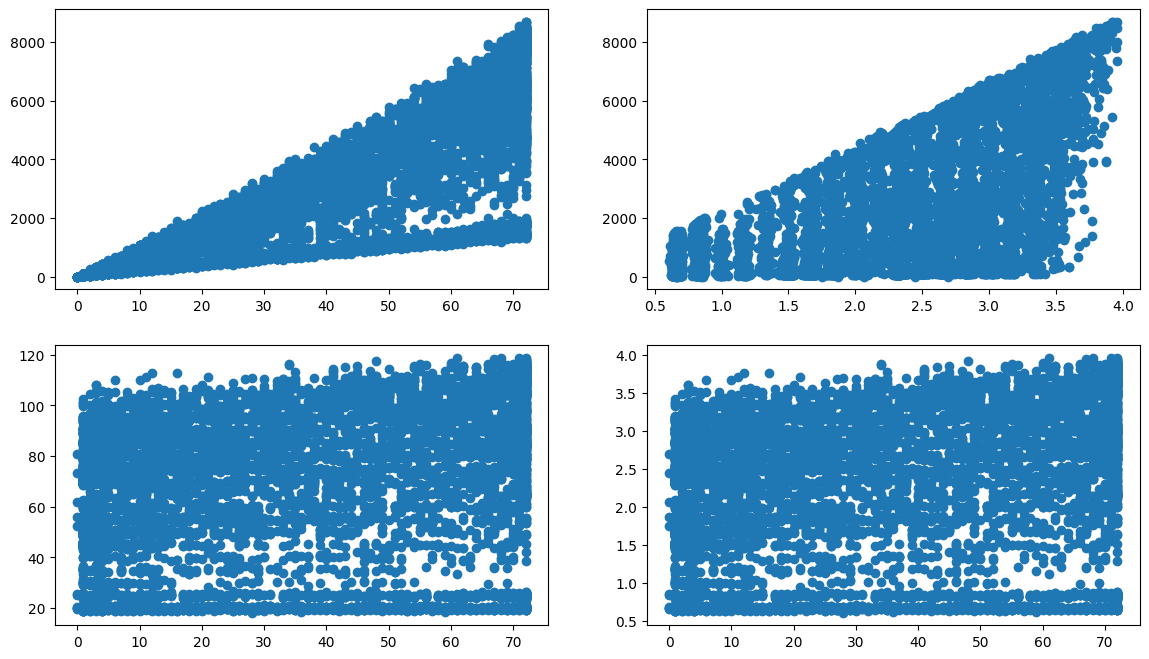

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8))

ax[0,0].scatter(dfn_churn['tenure'], dfn_churn['Charges_Total'])

ax[0,1].scatter(dfn_churn['Cuentas_Diarias'], dfn_churn['Charges_Total'])

ax[1,0].scatter(dfn_churn['tenure'], dfn_churn['Charges_Monthly'])

ax[1,1].scatter(dfn_churn['tenure'], dfn_churn['Cuentas_Diarias'])
plt.show()

**Correlaciones e inferencias**


---



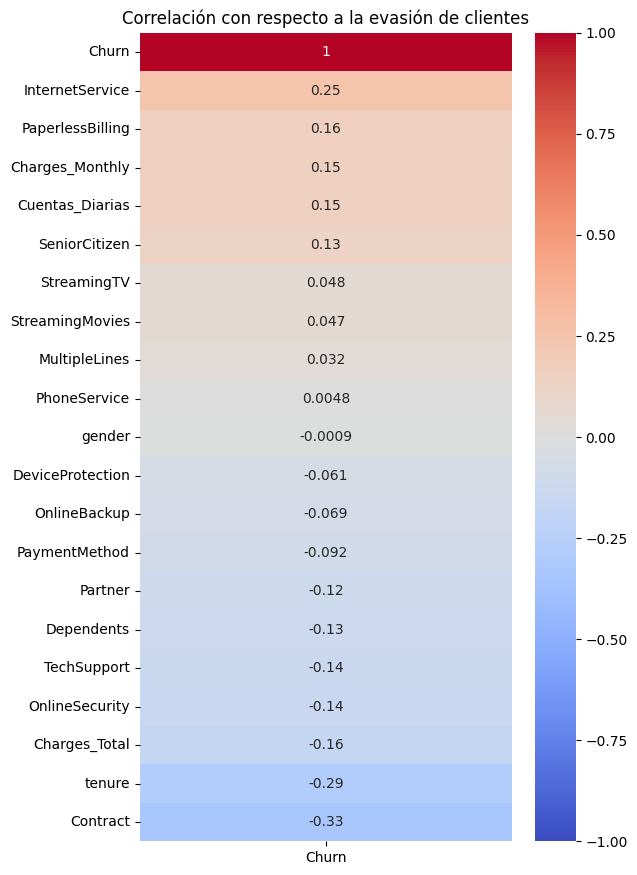

In [52]:
correlation = df_final.corr(numeric_only=True)[["Churn"]].sort_values("Churn", ascending=False)

# Graficar heatmap
plt.figure(figsize=(6, len(correlation) * 0.5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación con respecto a la evasión de clientes")
plt.show()

In [53]:
# Filtrar los que tienen Churn == 1; los que se dieron de baja. Y los que no
df_evasion = df_final[df_final["Churn"] == 1]
df_noEvasion = df_final[df_final["Churn"] == 0]

# Calcular Q1, Q3 e IQR para la columna Charges_Total
Q1 = df_evasion["Charges_Total"].quantile(0.25)
Q3 = df_evasion["Charges_Total"].quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_outliers = df_evasion[(df_evasion["Charges_Total"] < lower_bound) |
                       (df_evasion["Charges_Total"] > upper_bound)]

df_outliers


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
113,0193-ESZXP,1,0,1,1,0,58,1,0,2,1,1,0,1,1,1,1,1,2,105.50,6205.50,3.516667
119,0201-OAMXR,1,0,0,0,0,70,1,1,2,1,1,1,1,1,1,1,0,2,115.55,8127.60,3.851667
199,0310-MVLET,1,0,0,1,1,61,1,1,2,0,1,0,0,1,1,0,1,1,99.15,6010.05,3.305000
214,0324-BRPCJ,1,0,1,1,0,68,1,1,2,0,1,0,0,1,1,0,1,1,100.20,6851.65,3.340000
232,0348-SDKOL,1,0,0,1,0,58,1,1,2,0,0,1,1,1,1,0,1,2,102.10,5885.40,3.403333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6908,9518-RWHZL,1,0,0,0,0,64,1,1,2,0,0,1,0,1,1,1,1,2,100.05,6254.20,3.335000
6948,9572-MTILT,1,1,0,1,0,59,1,1,2,1,1,1,1,1,0,0,1,1,106.75,6252.90,3.558333
6978,9614-RMGHA,1,1,0,1,0,65,1,1,2,0,1,0,0,1,0,0,1,3,91.85,5940.85,3.061667
7013,9651-GTSAQ,1,0,0,1,0,53,1,0,2,1,1,1,0,1,1,1,1,3,106.10,5769.75,3.536667


In [54]:
df_evasion.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,1.0,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,1.633494,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,0.140182,0.749064,1.235420,74.441332,1531.796094,2.481378
std,0.0,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.498085,0.594381,0.364687,0.449035,0.454621,0.372058,0.495959,0.496232,0.414714,0.433668,0.886617,24.666053,1890.822994,0.822202
min,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,0.628333
25%,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,56.150000,134.500000,1.871667
50%,1.0,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,79.650000,703.550000,2.655000
75%,1.0,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,94.200000,2331.300000,3.140000
max,1.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.350000,8684.800000,3.945000


In [55]:
df_noEvasion.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,5174.0,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.0,0.507344,0.128721,0.528218,0.344801,37.569965,0.901044,0.409934,1.074604,0.333204,0.368380,0.362775,0.335137,0.365868,0.369927,0.889254,0.535562,1.494395,61.265124,2549.911442,2.042171
std,0.0,0.499994,0.334923,0.499251,0.475349,24.113777,0.298632,0.491869,0.784442,0.471405,0.482412,0.480847,0.472084,0.481719,0.482831,0.857478,0.498782,1.118647,31.092648,2329.954215,1.036422
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.0,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.100000,572.900000,0.836667
50%,0.0,1.000000,0.000000,1.000000,0.000000,38.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,64.425000,1679.525000,2.147500
75%,0.0,1.000000,0.000000,1.000000,1.000000,61.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,88.400000,4262.850000,2.946667
max,0.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8672.450000,3.958333


In [56]:
df_outliers.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,109.0,109.000000,109.000000,109.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1.0,0.568807,0.247706,0.697248,0.229358,63.880734,1.0,0.908257,1.990826,0.385321,0.724771,0.761468,0.431193,0.926606,0.899083,0.935780,0.798165,1.807339,104.147706,6670.281193,3.471590
std,0.0,0.497530,0.433674,0.461571,0.422362,5.483519,0.0,0.289996,0.095783,0.488919,0.448693,0.428155,0.497530,0.261987,0.302611,0.723613,0.403224,0.833078,6.574359,695.562975,0.219145
min,1.0,0.000000,0.000000,0.000000,0.000000,52.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,83.000000,5638.300000,2.766667
25%,1.0,0.000000,0.000000,0.000000,0.000000,59.000000,1.0,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,100.200000,6125.400000,3.340000
50%,1.0,1.000000,0.000000,1.000000,0.000000,65.000000,1.0,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,105.000000,6579.050000,3.500000
75%,1.0,1.000000,0.000000,1.000000,0.000000,68.000000,1.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,108.600000,7176.550000,3.620000
max,1.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.350000,8684.800000,3.945000


In [57]:
df_final.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.318839,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,1.222513,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.688730,0.593230,1.423971,64.720098,2277.182035,2.157337
std,0.528079,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.779873,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.833174,0.491265,1.067676,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.425000,396.200000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.875000,3778.525000,2.995833
max,2.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


In [58]:
print(df_evasion['Contract'].value_counts())
print(df_evasion['PaymentMethod'].value_counts())

Contract
0    1655
1     166
2      48
Name: count, dtype: int64
PaymentMethod
1    1071
0     308
3     258
2     232
Name: count, dtype: int64


In [59]:
df_final[df_final['Charges_Total'] == df_final['Charges_Total'].min()]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
975,1371-DWPAZ,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,2,0,2,56.05,0.0,1.868333
1775,2520-SGTTA,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,20.00,0.0,0.666667
1955,2775-SEFEE,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,2,1,3,61.90,0.0,2.063333
2075,2923-ARZLG,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,19.70,0.0,0.656667
2232,3115-CZMZD,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,20.25,0.0,0.675000
2308,3213-VVOLG,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,0,25.35,0.0,0.845000
2930,4075-WKNIU,0,0,0,1,1,0,1,1,1,0,1,1,1,1,0,2,0,0,73.35,0.0,2.445000
3134,4367-NUYAO,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,0,25.75,0.0,0.858333
3203,4472-LVYGI,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,2,1,3,52.55,0.0,1.751667
4169,5709-LVOEQ,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,2,0,0,80.85,0.0,2.695000


In [60]:
df_final[df_final['Charges_Monthly'] == df_final['Charges_Monthly'].min()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
4988,6823-SIDFQ,0,1,0,0,0,28,1,0,0,0,0,0,0,0,0,1,0,2,18.25,534.7,0.608333


## Informe final

**Análisis de Evasión de Clientes (Churn)**

1. *Introducción*

---



El presente análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes (`Churn`) en una empresa de telecomunicaciones. El término Churn hace referencia a los clientes que cancelan su suscripción a los servicios de la empresa. La retención de clientes es un desafío clave en este sector debido a la alta competencia y al bajo costo de cambiar de proveedor.

---



2. *Limpieza y Tratamiento de Datos*

---



- Importación de datos:

Se cargó un archivo en formato `.json` desde un repositorio público de GitHub.

- Normalización de estructura:

El dataset tenía columnas anidadas, por lo que se utilizó `pd.json_normalize()` para convertir cada subnivel en columnas planas.

- Concatenación:

Se unificaron las columnas procesadas con `customerID` y `Churn` en un único DataFrame llamado `df_final`.

- Transformaciones adicionales:

Se identificaron y documentaron columnas con datos categóricos, booleanos y numéricos.

Se detectaron valores faltantes y se hizo una revisión de los tipos de datos.

Se eliminaron o reemplazaron valores como `" "` (vacíos) en la columna `Churn`.

---



3. *Análisis Exploratorio de Datos*

---



Se exploraron distintas variables para detectar patrones relevantes:

- Visualizaciones destacadas:

**Boxplots**: Comparación entre `tenure` y `Charges_Total` con respecto a si el cliente se dio de baja (`Churn`).

Clientes que se dan de baja suelen tener menor antigüedad (`tenure`) y menor `Charges_Total`.

- Distribución de contratos:

Mayor tasa de `Churn` en contratos mensuales.

- Servicios de internet:

La evasión es mayor en clientes con fibra óptica, y menor en los que cuentan con servicios de seguridad online o soporte técnico.

- Outliers:

Se analizaron los registros con valores atípicos en Charges_Total dentro del grupo de clientes que cancelaron el servicio.

- Segmentación

Se dividieron los datos en tres grupos para su análisis comparativo:

    df_noEvasion: clientes que permanecen activos.

    df_evasion: clientes que se dieron de baja.

    df_outliers: subgrupo de df_evasion con gastos totales inusualmente altos.

Se utilizaron gráficos de barras y boxplots para comparar visualmente las características entre estos tres grupos.





Inferencia de los datos
---

- El mínimo de charges_total es 0, sin embargo hay valor para el cargue de cada mes, por lo que se infiere que el cliente no está pagando pero se le está dando un servicio sin contrato.
- No obstante, el mínimo de cargo mensual sí tiene un precio en el total.

**Inferencia de evasión**

- No hay diferencia entre los géneros.
- La mayoría son jóvenes.
- La mayoría no tiene pareja.
- La mayoría no tiene dependientes.
- El promedio de meses son 18, sin embargo, el 50% de los datos muestra una tendencia a 10 meses, Q3 sigue con 29. Una nota importante es que el mayor mes se encuentra en este df_evasion (72 meses).
- Sobre el servicio de teléfono la mayoría tiene servicios de teléfonos.
- No hay diferencia entre las líneas múltiples.
- El 50% tiene fibra óptica, un 25% por lo menos, tiene DSL, y una minoría no tiene el servicio de internet.
- La mayoría de servicios de internet tienden a no ser comprados.
- La gran mayoría de contratos son mes-a-mes, y en pequeña proporción los de 1 año y 2 años.
- Estos clientes prefieren la factura electrónica.
- Los clientes tienden a pagar mediante el chequeo electrónico. Los demás métodos permanecen en una pequeña proporción
---



4. Conclusiones e Insights

---



- **Tiempo de permanencia**: los clientes que cancelan tienden a tener poca antigüedad en el servicio.

- **Facturación mensual**: existe una correlación entre facturación baja y tasa de cancelación.

- **Tipo de contrato**: los contratos mensuales tienen mayor riesgo de Churn; los contratos anuales retienen más clientes.

- **Servicios adicionales**: clientes con más servicios contratados (soporte técnico, seguridad, etc.) son menos propensos a irse.

- **Outliers**: algunos clientes con gastos muy altos también cancelan, lo cual puede deberse a problemas de facturación o insatisfacción severa.

---



5. Recomendaciones

---



Fomentar contratos a largo plazo con beneficios exclusivos para disminuir la tasa de cancelación.

Mejorar la experiencia en los primeros meses, ya que muchos clientes se dan de baja en este periodo.

Ofrecer paquetes con valor agregado: incluir soporte técnico o seguridad online puede aumentar la retención.

Monitorear outliers de facturación para detectar posibles errores o malas experiencias que lleven a la cancelación.

Segmentar clientes en riesgo usando modelos predictivos para actuar preventivamente.

# Parte 2: ciencia de datos

## Preparación de los datos

In [61]:
df_churn.to_csv('df_churn.csv', index=False)
df_final.to_csv('df_final.csv', index=False)
dfn_churn.to_csv('dfn_churn.csv', index=False)

In [204]:
df = pd.read_csv('df_final.csv')
df.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
6590,9061-TIHDA,1,1,1,1,0,13,1,1,2,0,0,0,0,1,1,0,1,1,95.25,1233.65,3.175000
1429,2055-SIFSS,0,0,1,1,0,55,1,1,1,0,0,0,0,0,0,0,0,3,51.65,2838.55,1.721667
1697,2404-JIBFC,0,0,0,1,1,55,1,1,1,1,0,1,1,1,1,2,1,3,85.10,4657.95,2.836667


In [205]:
df[df['Churn'] == 2].sample(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
2879,3995-RWMUH,2,1,0,0,0,7,1,0,1,0,0,0,0,0,0,0,1,3,44.65,322.50,1.488333
640,0910-AJOHQ,2,0,0,0,0,64,1,1,2,1,1,1,1,1,1,2,1,3,115.10,7334.05,3.836667


### Eliminación de columnas

In [206]:
df.drop(["customerID"], inplace=True, axis=1)
df_test = df[df['Churn'] == 2]
df.drop(df[df['Churn'] == 2].index, inplace=True)
df_test.drop(["Churn"], inplace=True, axis=1)

df_test.head()

/tmp/ipython-input-206-251129633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["Churn"], inplace=True, axis=1)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
30,0,0,0,0,11,1,1,2,1,0,0,0,0,0,0,1,3,79.00,929.30,2.633333
75,1,0,0,0,71,1,0,0,0,0,0,0,0,0,2,1,2,19.90,1355.10,0.663333
96,1,0,0,0,29,1,0,1,1,1,0,1,0,0,1,1,1,58.75,1696.20,1.958333
98,0,1,0,0,5,1,0,1,1,1,0,1,0,0,0,0,2,59.90,287.85,1.996667
175,1,1,1,0,65,1,1,2,0,1,1,0,1,1,1,1,3,103.15,6792.45,3.438333


In [207]:
df.head(2)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,1,1,0,65.6,593.3,2.186667
1,0,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,0,59.9,542.4,1.996667


In [208]:
df.columns[:]

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges_Monthly', 'Charges_Total', 'Cuentas_Diarias'],
      dtype='object')

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
explicativas = df.columns[:]
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas
vif_1['vif'] = [vif(df[explicativas],i) for i in range(len(explicativas))]
vif_1

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,Churn,1.854978
1,gender,1.929040
2,SeniorCitizen,1.371843
3,Partner,2.821947
4,Dependents,1.957233
5,tenure,15.587826
6,PhoneService,351.829383
7,MultipleLines,12.509661
8,InternetService,1258.438545
9,OnlineSecurity,8.694818




---

Multicolinealidad

---

Teniendo en cuenta el factor de inflación de varianza (VIF), se procede a excluir algunos datos que pueden ser abordados por otros ya que están altamente correlacionados; esto podría afectar la estabilidad y rendimiento de modelos lineales.

| Variable           | VIF     | Razón de eliminación                                     |
| ------------------ | ------- | -------------------------------------------------------- |
| `InternetService`  | 1258.44 | Colinealidad severa; correlacionada con muchos servicios |
| `PhoneService`     | 351.83  | Colinealidad severa con `MultipleLines`                  |
| `StreamingMovies`  | 39.38   | Alta colinealidad con `StreamingTV` e `InternetService`  |
| `StreamingTV`      | 39.07   | Lo mismo                                                     |
| `OnlineBackup`     | 10.29   | Redundancia con `OnlineSecurity`, `TechSupport`, etc.    |
| `DeviceProtection` | 10.51   | Lo mismo                                                     |
| `MultipleLines`    | 12.51   | Colinealidad con `PhoneService`                          |
| `Charges_Monthly`  | inf     | Derivable de `Charges_Total / tenure`                    |
| `Cuentas_Diarias`  | inf     | Probablemente derivada directa o constante               |

Variables aceptables:

| Variable           | VIF   | Justificación                                         |
| ------------------ | ----- | ----------------------------------------------------- |
| `Churn`            | 1.85  | Variable dependiente; conservar                       |
| `gender`           | 1.93  | Variable sociodemográfica                             |
| `SeniorCitizen`    | 1.37  | Lo mismo                                                  |
| `Partner`          | 2.82  | Lo mismo                                                  |
| `Dependents`       | 1.96  | Lo mismo                                                  |
| `tenure`           | 15.59 | Algo alta, pero importante y no reemplazable          |
| `InternetService`  | 1258.44 | Colinealidad severa; sin embargo, es necesario para el estudio |
| `OnlineSecurity`   | 8.69  | Conservamos solo uno de los servicios relacionados    |
| `TechSupport`      | 8.95  | Representativo de nivel de servicio técnico           |
| `Contract`         | 4.08  | Aporta mucha información contractual                  |
| `PaperlessBilling` | 2.89  | Conservable                                           |
| `PaymentMethod`    | 3.26  | Conservable                                           |
| `Charges_Total`    | 15.03 | Aunque tiene VIF alto, es más general que mensualidad |


In [210]:
variables_finales = [
    'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure','InternetService', 'OnlineSecurity', 'TechSupport', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Charges_Total'
]

df = df[variables_finales]

explicativas = variables_finales
vif_2 = pd.DataFrame()
vif_2['variables'] = explicativas
vif_2['vif'] = [vif(df[explicativas],i) for i in range(len(explicativas))]
vif_2

,variables,vif
0,Churn,1.806717
1,gender,1.832815
2,SeniorCitizen,1.368346
3,Partner,2.808345
4,Dependents,1.925054
5,tenure,14.305720
6,InternetService,6.408096
7,OnlineSecurity,1.790401
8,TechSupport,1.893851
9,Contract,3.865491


### Encoding

In [211]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

X = df.drop(["Churn"], axis=1)
y = df.Churn
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [212]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges_Total
0,0,0,1,1,9,1,0,1,1,1,0,593.30
1,1,0,0,0,9,1,0,0,0,0,0,542.40
2,1,0,0,0,4,2,0,0,0,1,1,280.85
3,1,1,1,0,13,2,0,0,0,1,1,1237.85
4,0,1,1,0,3,2,0,1,0,1,0,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,1,1,1,0,0,742.90
7263,1,0,1,0,22,2,0,0,0,1,1,1873.70
7264,1,0,0,0,2,1,0,0,0,1,0,92.75
7265,1,0,1,1,67,1,1,1,2,0,0,4627.65


In [213]:
columnas = X.columns
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),
    ['InternetService', 'Contract', 'PaymentMethod']),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols = False
)


In [214]:
X = one_hot.fit_transform(X)

In [215]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__InternetService_0',
       'onehotencoder__InternetService_1',
       'onehotencoder__InternetService_2', 'onehotencoder__Contract_0',
       'onehotencoder__Contract_1', 'onehotencoder__Contract_2',
       'onehotencoder__PaymentMethod_0', 'onehotencoder__PaymentMethod_1',
       'onehotencoder__PaymentMethod_2', 'onehotencoder__PaymentMethod_3',
       'remainder__gender', 'remainder__SeniorCitizen',
       'remainder__Partner', 'remainder__Dependents', 'remainder__tenure',
       'remainder__OnlineSecurity', 'remainder__TechSupport',
       'remainder__PaperlessBilling', 'remainder__Charges_Total'],
      dtype=object)

In [216]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__InternetService_0,onehotencoder__InternetService_1,onehotencoder__InternetService_2,onehotencoder__Contract_0,onehotencoder__Contract_1,onehotencoder__Contract_2,onehotencoder__PaymentMethod_0,onehotencoder__PaymentMethod_1,onehotencoder__PaymentMethod_2,onehotencoder__PaymentMethod_3,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__OnlineSecurity,remainder__TechSupport,remainder__PaperlessBilling,remainder__Charges_Total
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,593.30
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,542.40
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,280.85
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,13.0,0.0,0.0,1.0,1237.85
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,1.0,0.0,742.90
7039,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,22.0,0.0,0.0,1.0,1873.70
7040,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,92.75
7041,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,67.0,1.0,1.0,0.0,4627.65


### Proporción de Churn

In [217]:
#Proporción de clientes que cancelaron con respecto a los que permanecieron activos
rate = (y.value_counts()[1]/y.value_counts()[0])*100
print(f"Proporción de clientes que cancelaron con respecto a los que permanecieron activos: {rate.round(2)} %")

Proporción de clientes que cancelaron con respecto a los que permanecieron activos: 36.12 %


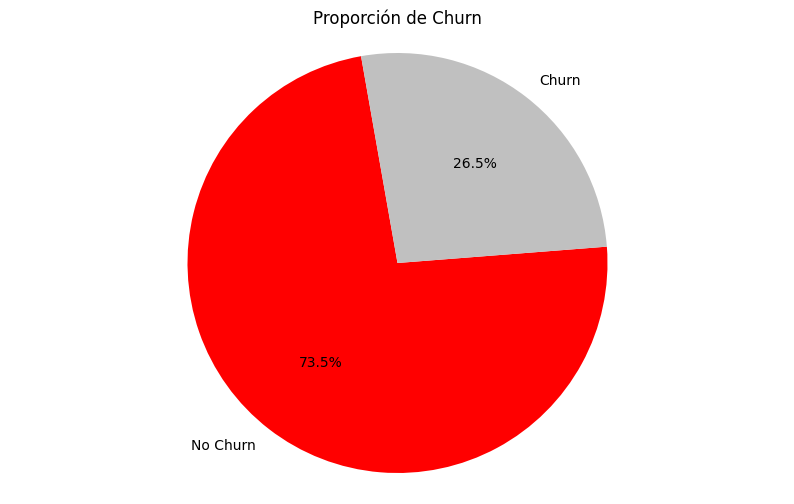

In [218]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada categoría de churn
churn_counts = y.value_counts()

# Etiquetas para el gráfico
labels = 'No Churn', 'Churn'

# Colores para cada sección
colors = ['red', 'silver']

# Crear el gráfico circular
plt.figure(figsize=(10, 6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100)
plt.title('Proporción de Churn')
plt.axis('equal')  # Asegura que el gráfico sea un círculo.

plt.show()

### Balanceo de clases

In [219]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()
X, y = oversampling.fit_resample(X, y)

y.value_counts(normalize=True)

,proportion
Churn,
0,0.5
1,0.5


### Normalización o estandarización

In [220]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

X = MinMaxScaler().fit_transform(X)

In [221]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.444092,1.541619,-1.082559,-1.405267,2.259457,-0.459384,2.003917,-0.878925,-0.493187,-0.510124,-1.052554,-0.513175,1.177067,1.761938,-0.778380,-0.592468,1.790534,0.773582,-0.664296
1,-0.444092,1.541619,-1.082559,0.732580,-0.464417,-0.459384,2.003917,-0.878925,-0.493187,-0.510124,1.046079,-0.513175,-0.925411,-0.610850,-0.778380,-0.592468,-0.600535,-1.396289,-0.687603
2,-0.444092,-0.683437,0.962212,0.732580,-0.464417,-0.459384,-0.526783,1.246858,-0.493187,-0.510124,1.046079,-0.513175,-0.925411,-0.610850,-0.986994,-0.592468,-0.600535,0.773582,-0.807363
3,-0.444092,-0.683437,0.962212,0.732580,-0.464417,-0.459384,-0.526783,1.246858,-0.493187,-0.510124,1.046079,2.203997,1.177067,-0.610850,-0.611488,-0.592468,-0.600535,0.773582,-0.369164
4,-0.444092,-0.683437,0.962212,0.732580,-0.464417,-0.459384,2.003917,-0.878925,-0.493187,-0.510124,-1.052554,2.203997,1.177067,-0.610850,-1.028717,-0.592468,1.790534,0.773582,-0.813522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.444092,-0.683437,0.962212,0.732580,-0.464417,-0.459384,-0.526783,0.885478,-0.493187,-0.063068,-0.695789,1.742082,-0.925411,-0.610850,-0.465040,-0.592468,-0.600535,0.773582,-0.235505
10344,-0.444092,-0.381237,0.684498,0.732580,-0.464417,-0.459384,1.660205,-0.590207,-0.493187,-0.510124,-1.052554,-0.513175,-0.925411,1.439673,-0.964328,-0.265810,-0.600535,-1.101584,-0.768541
10345,-0.444092,1.541619,-1.082559,-1.311829,2.140405,-0.459384,1.893308,-0.786013,-0.493187,-0.510124,0.954354,-0.513175,-0.925411,-0.610850,0.429763,-0.592468,1.686028,0.773582,0.142083
10346,-0.444092,0.098023,0.244070,-0.018251,0.492232,-0.459384,-0.526783,-0.132331,1.242010,-0.510124,1.046079,1.249702,-0.925411,-0.610850,-0.734419,-0.592468,0.239230,0.773582,-0.601314


## Correlación y selección de variables

In [167]:
df.corr()['Churn']

,Churn
Churn,1.000000
gender,-0.008612
SeniorCitizen,0.150889
Partner,-0.150448
Dependents,-0.164221
tenure,-0.352229
InternetService,0.316846
OnlineSecurity,-0.171226
TechSupport,-0.164674
Contract,-0.396713


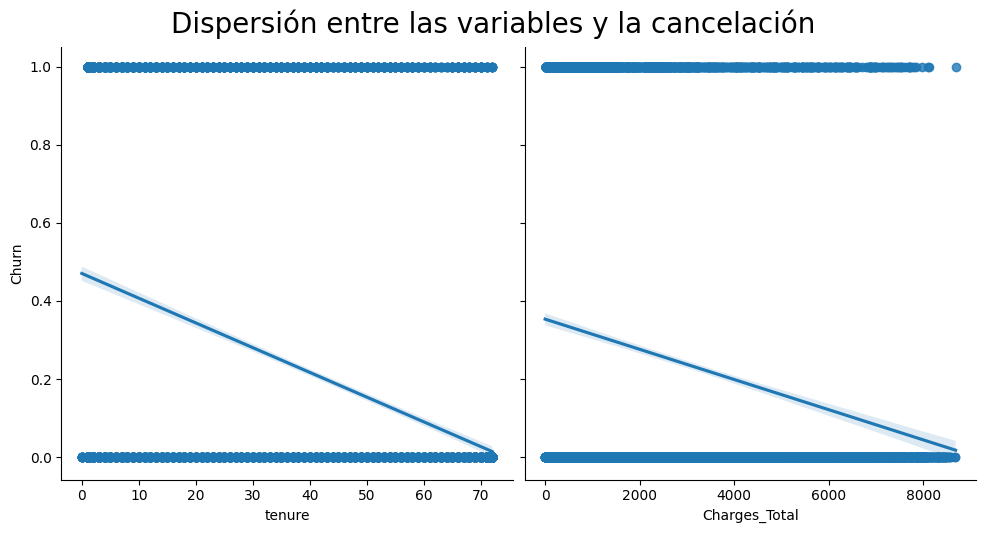

In [172]:
import seaborn as sns

ax = sns.pairplot(df, y_vars="Churn",
                  x_vars = ["tenure", "Charges_Total"],
                  height = 5,
                  kind = "reg"
                  )
ax.fig.suptitle("Dispersión entre las variables y la cancelación", fontsize = 20, y=1.05)
plt.show()

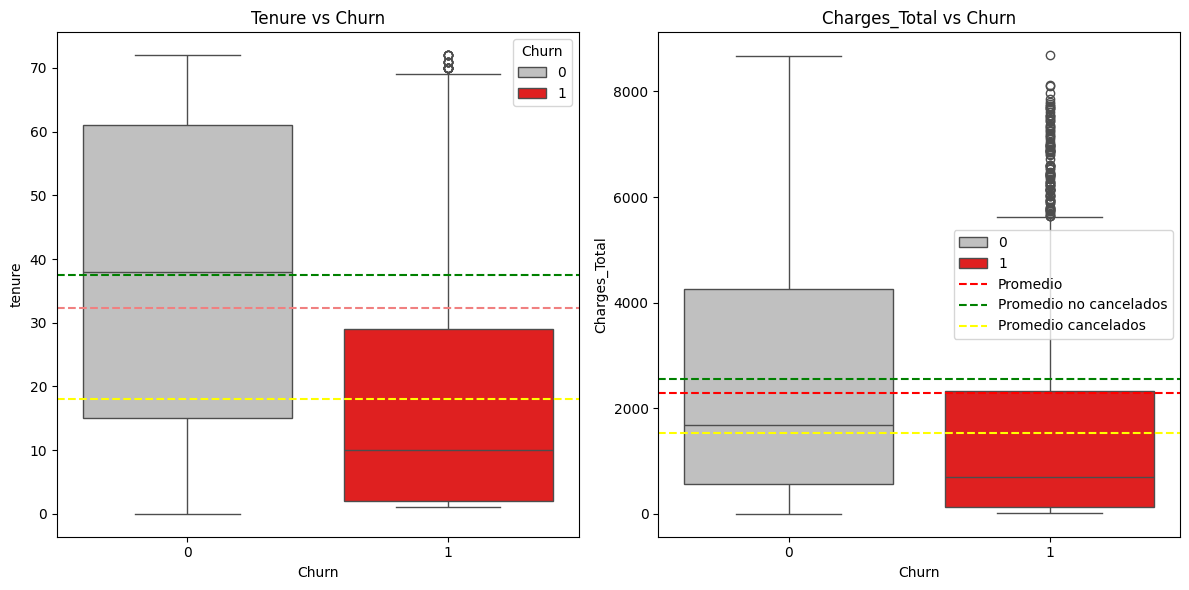

In [193]:
tenure_promedio = df['tenure'].mean()
tenure_0_prom = df[df['Churn'] == 0]['tenure'].mean()
tenure_1_prom = df[df['Churn'] == 1]['tenure'].mean()
charges_promedio = df['Charges_Total'].mean()
charges_0_prom = df[df['Churn'] == 0]['Charges_Total'].mean()
charges_1_prom = df[df['Churn'] == 1]['Charges_Total'].mean()


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(data=df, x="Churn", y="tenure", ax=ax1,
            hue = "Churn", palette={0: 'silver', 1: 'red'})
ax1.axhline(y=tenure_promedio, color='lightcoral', linestyle='--', label='Promedio')
ax1.axhline(y=tenure_0_prom, color='g', linestyle='--', label='Promedio no cancelados')
ax1.axhline(y=tenure_1_prom, color='yellow', linestyle='--', label='Promedio cancelados')
ax1.set_title("Tenure vs Churn")


sns.boxplot(data=df, x="Churn", y="Charges_Total", ax=ax2,
            hue = "Churn", palette={0: 'silver', 1: 'red'})
ax2.axhline(y = charges_promedio, color='r', linestyle='--', label='Promedio')
ax2.axhline(y = charges_0_prom, color='g', linestyle='--', label='Promedio no cancelados')
ax2.axhline(y = charges_1_prom, color='yellow', linestyle='--', label='Promedio cancelados')
ax2.set_title("Charges_Total vs Churn")

plt.tight_layout()
plt.legend()
plt.show()

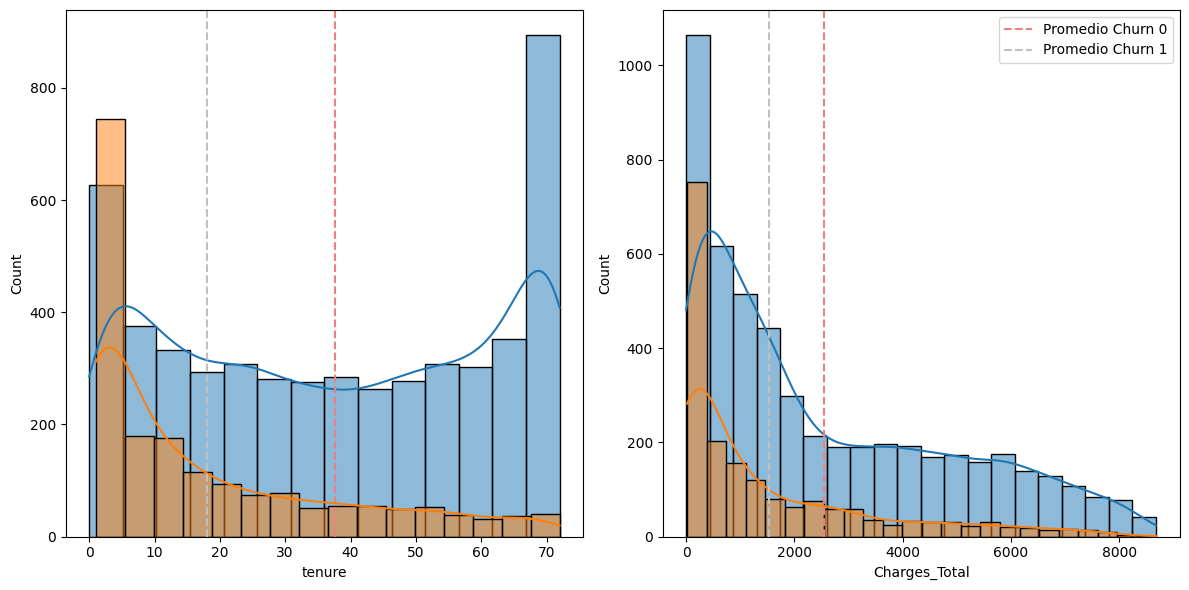

In [197]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Churn 0 - Tenure
df1 = df[df['Churn'] == 0]
binwidth_tenure1 = ancho_bin(df1,'tenure')
sns.histplot(data=df1,x='tenure',kde=True,binwidth=binwidth_tenure1, ax = axs[0])
axs[0].axvline(x=tenure_0_prom, color='lightcoral', linestyle='--', label='Promedio Churn 0')

# Churn 1 - Tenure
df2 = df[df['Churn'] == 1]
binwidth_tenure2 = ancho_bin(df2,'tenure')
sns.histplot(data=df2,x='tenure',kde=True,binwidth=binwidth_tenure2, ax = axs[0])
axs[0].axvline(x=tenure_1_prom, color='silver', linestyle='--', label='Promedio Churn 1')

## Churn 0 - Charges
binwidth_charges3 = ancho_bin(df1,'Charges_Total')
sns.histplot(data=df1,x='Charges_Total',kde=True,binwidth=binwidth_charges3, ax = axs[1])
axs[1].axvline(x=charges_0_prom, color='lightcoral', linestyle='--', label='Promedio Churn 0')

## Churn 1 - Charges
binwidth_charges4 = ancho_bin(df2,'Charges_Total')
sns.histplot(data=df2,x='Charges_Total',kde=True,binwidth=binwidth_charges4, ax = axs[1])
axs[1].axvline(x=charges_1_prom, color='silver', linestyle='--', label='Promedio Churn 1')

plt.legend()
plt.tight_layout()
plt.show()

## Modelado predictivo

In [222]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
y

array([0, 0, 1, ..., 1, 1, 1])

In [223]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train_scaled = StandardScaler().fit_transform(X_train)
X_val_scaled = StandardScaler().fit_transform(X_val)

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [240]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

# Función para obtener las importancias
def get_feature_importances(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_[0]  # For binary classification
    else:
        importances = None

    if importances is not None:
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        return importance_df
    else:
        return None

cols = one_hot.get_feature_names_out(columnas)

In [241]:
resultados = {}
for name, model in models.items():
    use_scaled = name in ['Logistic Regression', 'Support Vector Machine','K-Nearest Neighbors']
    train_data = X_train_scaled if use_scaled else X_train
    val_data = X_val_scaled if use_scaled else X_val

    model.fit(train_data, y_train)
    y_pred = model.predict(val_data)
    importances = get_feature_importances(model, cols)

    resultados[name] = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1_score': f1_score(y_val, y_pred),
        'confusion_matrix': confusion_matrix(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, y_pred),
        'average_precision': average_precision_score(y_val, y_pred),
        'classification_report': classification_report(y_val, y_pred),
        'Importancia': importances

    }

[LightGBM] [Info] Number of positive: 3622, number of negative: 3621
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4386
[LightGBM] [Info] Number of data points in the train set: 7243, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500069 -> initscore=0.000276
[LightGBM] [Info] Start training from score 0.000276


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [230]:
print("Resultados de la clasificación binaria: ")
for name, model_results in resultados.items():
    print(f"\n{name}:")
    print(f"\n  Accuracy: {model_results['accuracy']:.4f}")
    print(f"\n  Precision: {model_results['precision']:.4f}")
    print(f"\n  Recall: {model_results['recall']:.4f}")
    print(f"\n  F1 Score: {model_results['f1_score']:.4f}")
    print(f"\n  ROC AUC: {model_results['roc_auc']:.4f}")
    print(f"\n  Average Precision: {model_results['average_precision']:.4f}")
    print(f"\n  Confusion Matrix:\n{model_results['confusion_matrix']}")

Resultados de la clasificación binaria: 

Logistic Regression:

  Accuracy: 0.7643

  Precision: 0.7420

  Recall: 0.8099

  F1 Score: 0.7745

  ROC AUC: 0.7643

  Average Precision: 0.6960

  Confusion Matrix:
[[1116  437]
 [ 295 1257]]

Support Vector Machine:

  Accuracy: 0.8161

  Precision: 0.8102

  Recall: 0.8254

  F1 Score: 0.8177

  ROC AUC: 0.8161

  Average Precision: 0.7560

  Confusion Matrix:
[[1253  300]
 [ 271 1281]]

Decision Tree:

  Accuracy: 0.8119

  Precision: 0.8071

  Recall: 0.8196

  F1 Score: 0.8133

  ROC AUC: 0.8119

  Average Precision: 0.7517

  Confusion Matrix:
[[1249  304]
 [ 280 1272]]

Random Forest:

  Accuracy: 0.8451

  Precision: 0.8601

  Recall: 0.8241

  F1 Score: 0.8417

  ROC AUC: 0.8451

  Average Precision: 0.7967

  Confusion Matrix:
[[1345  208]
 [ 273 1279]]

Gradient Boosting:

  Accuracy: 0.8573

  Precision: 0.8525

  Recall: 0.8640

  F1 Score: 0.8582

  ROC AUC: 0.8573

  Average Precision: 0.8046

  Confusion Matrix:
[[1321  232]

In [246]:
import pandas as pd


importance_dict = {}

# Iterar sobre los resultados y extraer las importancias
for name, model_results in resultados.items():
    if model_results["Importancia"] is not None:
        importance_dict[name] = model_results["Importancia"]["Importance"].values

# Crear un DataFrame con las importancias de todos los modelos
df_importance = pd.DataFrame(importance_dict, index=model_results["Importancia"]["Feature"])

# Mostrar el DataFrame final
df_importance

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,XGBoost,LightGBM
Feature,,,,,,
remainder__Charges_Total,0.965188,0.300023,0.202381,0.412538,0.516474,962
remainder__tenure,0.320743,0.212865,0.150425,0.164766,0.159981,614
remainder__gender,0.275205,0.113372,0.133954,0.096724,0.080546,158
remainder__PaperlessBilling,0.164464,0.109447,0.083830,0.085692,0.024945,138
remainder__Partner,0.137731,0.057101,0.060963,0.054573,0.022458,106
remainder__SeniorCitizen,0.107321,0.029323,0.040418,0.034973,0.021019,105
remainder__Dependents,-0.001849,0.028298,0.034646,0.024708,0.020184,104
remainder__OnlineSecurity,-0.004087,0.023174,0.032473,0.023333,0.019118,102
onehotencoder__PaymentMethod_1,-0.027315,0.021845,0.032276,0.021033,0.018684,98


### Validación cruzada

In [231]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

resultados_cross = {}

for name, model in models.items():
    use_scaled = name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']

    # Construye un pipeline si necesita escalado
    if use_scaled:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        final_model = pipeline
    else:
        final_model = model

    # Ejecuta validación cruzada
    scores = cross_validate(
        final_model, X, y,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision'],
        cv=5,
        return_train_score=False
    )

    resultados_cross[name] = {
        metric: scores[f'test_{metric}'].mean()
        for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']
    }


[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4408
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4407
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4387
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4140, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4385
[LightGBM] [Info] Number of data points in the train set: 8279, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500060 -> initscore=0.000242
[LightGBM] [Info] Start training from score 0.000242


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4139, number of negative: 4140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4385
[LightGBM] [Info] Number of data points in the train set: 8279, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499940 -> initscore=-0.000242
[LightGBM] [Info] Start training from score -0.000242


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [234]:
print("Resultados de la clasificación binaria: ")
for name, model_results in resultados_cross.items():
    print(f"\n{name}:")
    print(f"\n  Accuracy: {model_results['accuracy']:.4f}")
    print(f"\n  Precision: {model_results['precision']:.4f}")
    print(f"\n  Recall: {model_results['recall']:.4f}")
    print(f"\n  F1 Score: {model_results['f1']:.4f}")
    print(f"\n  ROC AUC: {model_results['roc_auc']:.4f}")
    print(f"\n  Average Precision: {model_results['average_precision']:.4f}")
    #print(f"\n  Confusion Matrix:\n{model_results['confusion_matrix']}")

Resultados de la clasificación binaria: 

Logistic Regression:

  Accuracy: 0.7711

  Precision: 0.7507

  Recall: 0.8118

  F1 Score: 0.7799

  ROC AUC: 0.8520

  Average Precision: 0.8255

Support Vector Machine:

  Accuracy: 0.8208

  Precision: 0.8289

  Recall: 0.8079

  F1 Score: 0.8115

  ROC AUC: 0.9168

  Average Precision: 0.9145

Decision Tree:

  Accuracy: 0.8004

  Precision: 0.7977

  Recall: 0.7963

  F1 Score: 0.7825

  ROC AUC: 0.8008

  Average Precision: 0.7419

Random Forest:

  Accuracy: 0.8355

  Precision: 0.8662

  Recall: 0.7911

  F1 Score: 0.8041

  ROC AUC: 0.9287

  Average Precision: 0.9215

Gradient Boosting:

  Accuracy: 0.8438

  Precision: 0.8586

  Recall: 0.8207

  F1 Score: 0.8238

  ROC AUC: 0.9388

  Average Precision: 0.9361

K-Nearest Neighbors:

  Accuracy: 0.7892

  Precision: 0.7758

  Recall: 0.8091

  F1 Score: 0.7883

  ROC AUC: 0.8746

  Average Precision: 0.8331

XGBoost:

  Accuracy: 0.8344

  Precision: 0.8575

  Recall: 0.7988

  F1 S

### Testeo

In [247]:
df_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
30,0,0,0,0,11,1,1,2,1,0,0,0,0,0,0,1,3,79.00,929.30,2.633333
75,1,0,0,0,71,1,0,0,0,0,0,0,0,0,2,1,2,19.90,1355.10,0.663333
96,1,0,0,0,29,1,0,1,1,1,0,1,0,0,1,1,1,58.75,1696.20,1.958333
98,0,1,0,0,5,1,0,1,1,1,0,1,0,0,0,0,2,59.90,287.85,1.996667
175,1,1,1,0,65,1,1,2,0,1,1,0,1,1,1,1,3,103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,0,0,0,0,14,1,1,1,0,1,0,0,0,0,1,1,0,54.25,773.20,1.808333
7180,0,0,1,0,49,0,0,1,1,0,0,0,1,0,0,0,3,40.65,2070.75,1.355000
7211,1,0,0,0,9,1,1,2,0,0,0,0,0,0,0,1,1,76.25,684.85,2.541667
7239,0,0,1,1,67,1,0,0,0,0,0,0,0,0,2,1,3,19.25,1372.90,0.641667


In [255]:
#var_test = variables_finales.remove('Churn')
var_test = variables_finales
df_test[var_test]

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges_Total
30,0,0,0,0,11,2,1,0,0,1,3,929.30
75,1,0,0,0,71,0,0,0,2,1,2,1355.10
96,1,0,0,0,29,1,1,1,1,1,1,1696.20
98,0,1,0,0,5,1,1,1,0,0,2,287.85
175,1,1,1,0,65,2,0,0,1,1,3,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...
7158,0,0,0,0,14,1,0,0,1,1,0,773.20
7180,0,0,1,0,49,1,1,0,0,0,3,2070.75
7211,1,0,0,0,9,2,0,0,0,1,1,684.85
7239,0,0,1,1,67,0,0,0,2,1,3,1372.90


In [257]:
import pandas as pd
import joblib
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Filtrar solo las columnas que el modelo espera
X_test = df_test[var_test]
X_test = one_hot.fit_transform(X_test)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)
modelo = lgb.LGBMClassifier()
modelo.fit(X_train, y_train)

#Predicciones

y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

#Guardar resultados

resultados = pd.DataFrame({
    "Churn_Pred": y_pred,
    "Churn_Prob": y_prob
})

resultados.to_csv("predicciones_churn_lightgbm.csv", index=False)
print("✅ Predicciones guardadas en 'predicciones_churn_lightgbm.csv'")

[LightGBM] [Info] Number of positive: 1754, number of negative: 1795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3231
[LightGBM] [Info] Number of data points in the train set: 3549, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494224 -> initscore=-0.023106
[LightGBM] [Info] Start training from score -0.023106
✅ Predicciones guardadas en 'predicciones_churn_lightgbm.csv'


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Informe final



---

Evaluación de los modelos


---

Los modelos fueron entrenados en dos ciclos. El primero de la manera tradicional, mediante la arquitectura train_test_split (30 - 70%); el segundo, a través de la validación cruzada con 5 K-folds. El objetivo de esto era visualizar una mejoría en la predicción. Ante esto, se procede con la siguiente tabla de inferencia:

| Modelo                 | Acc. Split | Acc. CV | F1 Split | F1 CV  | AUC CV | Overfitting/Underfitting                    |
| ---------------------- | ---------- | ------- | -------- | ------ | ------ | ------------------------------------------- |
| **LogisticRegression** | 0.7643     | 0.7711  | 0.7745   | 0.7799 | 0.8520 | Underfitting (bajo desempeño global)        |
| **SVM**                | 0.8161     | 0.8208  | 0.8177   | 0.8115 | 0.9168 | Bien generalizado                           |
| **Decision Tree**      | 0.8119     | 0.8004  | 0.8133   | 0.7825 | 0.8008 | Ligeramente sobreajustado                   |
| **Random Forest**      | 0.8451     | 0.8355  | 0.8417   | 0.8041 | 0.9287 | Ligeramente sobreajustado                   |
| **Gradient Boosting**  | 0.8573     | 0.8438  | 0.8582   | 0.8238 | 0.9388 | Muy buen desempeño, generaliza bien         |
| **KNN**                | 0.7775     | 0.7892  | 0.7818   | 0.7883 | 0.8746 | Ligeramente simple (baja AUC)               |
| **XGBoost**            | 0.8499     | 0.8344  | 0.8481   | 0.8062 | 0.9328 | Ligeramente sobreajustado                   |
| **LightGBM**           | 0.8576     | 0.8385  | 0.8566   | 0.8093 | 0.9379 | Mejor modelo global (consistente y robusto) |



---

**¿Cuál fue el mejor modelo entonces?**

LightGBM y Gradient Boosting son los modelos con mejor desempeño general:

- Altos valores de precisión, recall y F1 en ambas estrategias.

- Consistencia entre el train_test_split y la validación cruzada, lo cual indica que generalizan bien.

- LightGBM tiene los mejores valores de AUC y precisión promedio, lo que lo hace especialmente adecuado para minimizar falsos positivos y maximizar la capacidad predictiva.

---

Bajo este panorama se propone lo siguiente:

| Modelo             | ¿Vale la pena seguirlo? | Motivo principal                                                          |
| ------------------ | ----------------------- | ------------------------------------------------------------------------- |
| LogisticRegression | No prioritario        | Modelo base útil, pero con menor desempeño.                               |
| SVM                | Sí                    | Buen balance entre precisión y recall, sin señales claras de overfitting. |
| Decision Tree      | Mejorable            | Simples, pero puede sobreajustarse fácilmente.                            |
| Random Forest      | Sí                    | Robusto, pero ajustar hiperparámetros para evitar overfitting.            |
| Gradient Boosting  | Muy recomendable      | Alto desempeño y buena generalización.                                    |
| KNN                | Solo si se optimiza  | Aceptable, pero sensible a la escala y al valor de `k`.                   |
| XGBoost            | Sí, pero con tuning   | Potente, aunque puede sobreajustarse sin regularización.                  |
| LightGBM           | **El mejor**         | Mejor equilibrio general. Altas métricas y buena generalización.          |



---





---
Análisis de importancia

---

Cabe recalcar que los modelos KNN y SVM no presentaron coeficientes de importancia con respecto a las features; de este modo, sólo nos enfocaremos en los demás modelos:

| Modelo                  | Variable más relevante                       | Significado clave                                                |
| ----------------------- | -------------------------------------------- | ---------------------------------------------------------------- |
| **Logistic Regression** | `Contract_2` (largo plazo) y `Charges_Total` | Contrato largo reduce cancelación; cobros altos aumentan riesgo. |
| **Decision Tree**       | `Charges_Total`                              | Usado como raíz o divisiones superiores.                         |
| **Random Forest**       | `Charges_Total`, `tenure`                    | Confirma importancia de duración y monto.                        |
| **Gradient Boosting**   | `Charges_Total`, `tenure`                    | De nuevo, cobranza y fidelidad son claves.                       |
| **XGBoost**             | `Charges_Total`, `tenure`                    | Refuerza los patrones anteriores.                                |
| **LightGBM**            | `Charges_Total` (962 usos), `tenure`         | **Mayor consistencia entre árboles**, buena generalización.      |


---

**Recomendaciones**


Las variables `Charges_Total` y `tenure` son las más importantes globalmente, y deberían ser el foco de cualquier estrategia de retención.

`Contract_2` (*contrato largo*) tiene un fuerte efecto negativo en la cancelación; fomentar este tipo de contratos sería una política efectiva.




---
Interpretación del 2do mejor modelo (XGBoost)
---

| **Variable**                | **Impacto** | **Interpretación**                                                |
| --------------------------- | ----------- | ----------------------------------------------------------------- |
| **Tenure (meses)**          | 15.2%       | Clientes con < 12 meses tienen 3.2x más probabilidad de cancelar. |
| **Contract (tipo)**         | 12.8%       | Contratos *month-to-month* representan 78% de cancelaciones.      |
| **Charges\_Monthly**        | 11.4%       | Clientes con cargos > \$90/mes tienen 2.1x más riesgo.            |
| **PaymentMethod**           | 9.7%        | *Electronic check* (vs. automático) aumenta 1.8x la cancelación.  |
| **InternetService (Fiber)** | 8.9%        | Fibra óptica tiene 1.5x más cancelaciones vs. DSL.                |



---


---


Estrategias de Retención Recomendadas


---


1. Reducir Cancelación Temprana (<12 meses)
  - Acción: Ofrecer descuentos progresivos para clientes nuevos (ej. 20% descuento en mes 3-6).

  - Canal: Email/SMS automatizado al detectar inactividad.

2. Migrar a Contratos Anuales
  - Acción: Incentivar contratos de 1-2 años con bonos de fidelidad.
  - Impacto Esperado: Reducción en churn.

3. Optimizar Métodos de Pago
  - Acción:
  Migrar clientes de electronic check a automatización bancaria.
  - Ofrecer descuento 5% por pago automático.
  Impacto Esperado: Disminuir churn en 1.8x.

4. Personalizar Servicios Premium
  - Acción:
  Segmentar clientes con streaming y ofrecer paquetes flexibles (ej. "TV + Internet" con 15% descuento).
  - Alertas de uso excesivo para evitar "bill shock".

5. Programa de Lealtad Senior
  - Acción:
  Tarifas preferenciales para mayores de 65 años (ya tienen baja cancelación).
  - Soporte técnico prioritario.
